In [1]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn import manifold


In [15]:
similarities = np.genfromtxt('DistanceMetrices/blobs/PredictionSimilarityDistance.csv', delimiter=',')

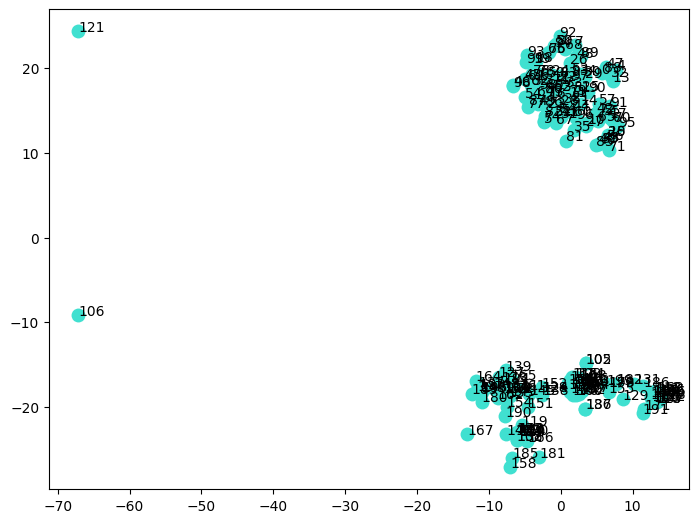

In [16]:
EPSILON = np.finfo(np.float32).eps
seed = np.random.RandomState(seed=3)

distance_matrix = similarities[1:,:]

tsne = manifold.TSNE(
    n_components=2,
    metric="precomputed",
    random_state=seed,
    n_jobs=1,
    init="random",
    perplexity=15
)
pos = tsne.fit(distance_matrix).embedding_

fig = plt.figure(1)
ax = plt.axes([0.0, 0.0, 1.0, 1.0])

s = 100
plt.scatter(pos[:, 0], pos[:, 1], color="turquoise", s=s, lw=0, label="NMDS")
# plt.legend(scatterpoints=1, loc="best", shadow=False)

# distance_matrix = distance_matrix.max() / (distance_matrix + EPSILON) * 100
# np.fill_diagonal(distance_matrix, 0)

for i in range(len(similarities[0])):
    ax.annotate(i, (pos[i,0], pos[i,1]), fontsize=10)
    # ax.annotate(int(similarities[0, i]), (pos[i,0], pos[i,1]))

plt.show()


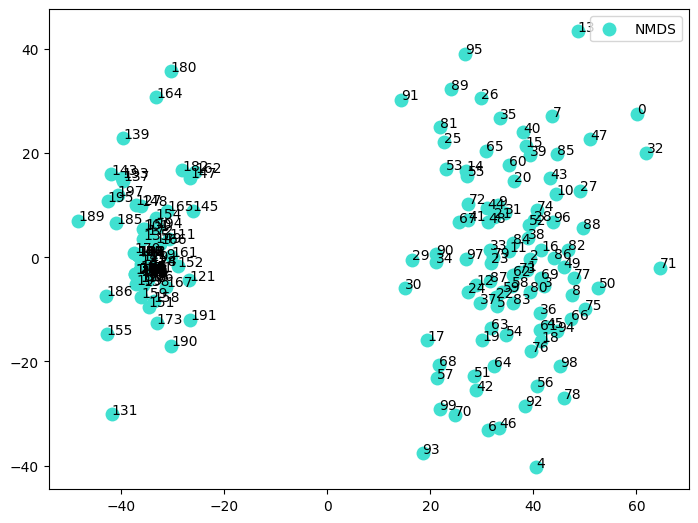

In [17]:
EPSILON = np.finfo(np.float32).eps
seed = np.random.RandomState(seed=3)

distance_matrix = similarities[1:,:]

nmds = manifold.MDS(
    n_components=2,
    metric=True,
    dissimilarity="precomputed",
    max_iter=10000,
    random_state=seed,
    n_jobs=1,
    normalized_stress="auto"
)
pos = nmds.fit(distance_matrix).embedding_

fig = plt.figure(1)
ax = plt.axes([0.0, 0.0, 1.0, 1.0])

s = 100
plt.scatter(pos[:, 0], pos[:, 1], color="turquoise", s=s, lw=0, label="NMDS")
plt.legend(scatterpoints=1, loc="best", shadow=False)

# distance_matrix = distance_matrix.max() / (distance_matrix + EPSILON) * 100
# np.fill_diagonal(distance_matrix, 0)

for i in range(len(similarities[0])):
    ax.annotate(i, (pos[i,0], pos[i,1]))
    # ax.annotate(int(similarities[0, i]), (pos[i,0], pos[i,1]))

plt.show()

In [9]:
distance_matrix[71,77]

33.0

In [59]:
def is_metric(dm: np.ndarray):
    D = dm
    N = dm.shape[0]

    for k in range(N):
        for j in range(k):
            if not (D[k, j] <= D[k, :] + D[:, j]).all():
                print("i is {} and j is {}".format(k, j))
                return False


    return True

In [60]:
is_metric(distance_matrix)

i is 31 and j is 11


False

In [172]:
distance_matrix

array([[   0., 2402., 2528., ..., 2398., 2542., 2510.],
       [2402.,    0., 2554., ..., 2280., 2456., 2456.],
       [2528., 2554.,    0., ..., 2474., 2374., 2406.],
       ...,
       [2398., 2280., 2474., ...,    0., 2448., 2472.],
       [2542., 2456., 2374., ..., 2448.,    0., 2412.],
       [2510., 2456., 2406., ..., 2472., 2412.,    0.]])

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    6.,    0.,    0.,  206.,    0.,    0., 1194.,    0.,
        2954.,    0.,    0., 3274.,    0.,    0., 1832.,    0.,  396.,
           0.,    0.,   38.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.]),
 array([30.   , 30.375, 30.75 , 31.125, 31.5  , 31.875, 32.25 , 32.625,
        33.   , 33.375, 33.75 , 34.125, 34.5  , 34.875, 35.25 , 35.625,
        36.   , 36.375, 36.75 , 37.125, 37.5  , 37.875, 38.25 , 38.625,
        39.   , 39.375, 39.75 , 40.125, 40.5  , 40.875, 41.25 , 41.625,
        42.   , 42.375, 42.75 , 43.125, 43.5  , 43.875, 44.25 , 44.625,
        45.   ]),
 <BarContainer object of 40 artists>)

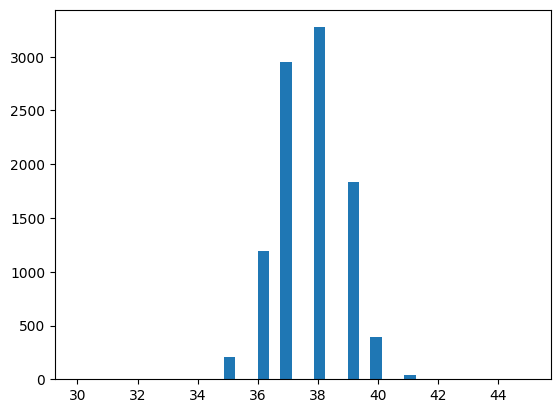

In [6]:
plt.hist(distance_matrix.flat, bins=40, range=(30,45))

In [206]:
distance_matrix[44,23]

2202.0

In [28]:
np.unique(distance_matrix)

array([  0.,  78.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105.])